# Proyecto 11: Aprendizaje automático en negocios

## Introducción

La compañía de extracción de petróleo OilyGiant quiere encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo. Se tienen datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región.

## Objetivo

Crear un modelo de regresión linear para predecir los valores de producción de las regiones en cuestión. Se busca definir qué región será seleccionada para perforar 200 pozos con un presupuesto de 100,000 millones de dólares, por lo que cada pozo debe producir por lo menos 50,000 dólares para que sea rentable, esto se realizará por medio de bootstrapping.

## Importación de librerías y carga de datasets

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_0.csv')
df_2 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_1.csv')
df_3 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_2.csv')

## Análisis preeliminar de datos

Primero veremos una muestra de un dataset para ver el tipo de datos y validar si alguno no es necesario, además de comprobar si hay valores ausentes para proceder con el modelo.

In [3]:
print(df_1.head())
df_1.info()

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
print(df_2.sample(10))
df_2.info()

          id         f0         f1        f2     product
17093  NDCs8  -3.369410  -9.891461  3.002543   84.038886
34478  1bB93   2.051275 -14.181650  2.996009   84.038886
14277  Z6vJq -10.527303  -8.950743  2.007622   57.085625
6479   Ju4rD  13.544422  -8.270923  5.002070  134.766305
91938  2Epes -11.217275 -12.481099  3.997213  110.992147
42206  PUtYG   3.596299 -10.493009  3.999075  110.992147
60061  C1I35 -15.468645  -6.999435  1.993780   57.085625
62116  1bzMW   3.585006   8.992391  4.993698  134.766305
33512  Akp9X  -4.356971  -4.957868  2.995210   84.038886
78607  EWrKA  -3.571208  -4.807907  2.997018   84.038886
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null 

In [8]:
print(df_3.sample(10))
df_3.info()

          id        f0        f1        f2     product
2427   seyA7 -0.664996  3.175957  7.043247  165.288891
22240  ccNH9  1.017089 -0.310800  4.772705   98.798355
94934  K8lR1  0.059825 -1.713911 -2.721046   75.472993
69420  EfDIo  0.338318 -2.396382 -1.713179   68.646909
79768  M4arC  0.789849 -0.603951  1.648399   78.609630
90254  83jYt  1.119777 -1.625189  6.362882  149.030820
73844  26gdF -2.116491 -0.116843  5.141264  172.107991
64465  E3qkl -1.875492  1.589099  0.727207  135.246123
43197  vPCJv  0.908576  0.099811  0.119565   91.985991
8315   iSKn4 -1.863658 -2.290102  0.939737  139.372791
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float

In [9]:
df_1[df_1.isna().any(axis=1)]

,id,f0,f1,f2,product


In [10]:
df_2[df_2.isna().any(axis=1)]

,id,f0,f1,f2,product


In [11]:
df_3[df_3.isna().any(axis=1)]

,id,f0,f1,f2,product


Vemos que no hay valores ausentes ni duplicados, podemos proceder al modelo y análisis.

## Creación del modelo de ML

Vamos a crear un modelo linear de machine learning para la producción de cada pozo basándonos en f0, f1 y f2.

In [12]:
df_test = df_1.drop('id', axis=1)

In [13]:
features = df_test.drop('product', axis=1)
target = df_test['product']

In [14]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=.25, random_state=12345)

In [15]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

In [16]:
score = mean_squared_error(target_valid, predictions_valid)**.5
print(score)

37.5794217150813


In [17]:
def production(data, region): #se introduce el dataframe y el número de la región como parámetros, devuelve las filas del dataframe del conjunto de validación
    features = data.drop(['product', 'id'], axis=1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=.25, random_state=12345)
    model = LinearRegression()
    model.fit(features_train, target_train)
    pred_val = model.predict(features_valid)
    data['predictions'] = model.predict(features)
    rmse = mean_squared_error(target_valid, pred_val)**.5
    avg_prod = data['predictions'].mean()
    print(f"El RMSE para la región {region} es de {rmse}")
    print(f"El valor promedio que se predice de producción de la región {region} es igual a {avg_prod}")
    return data.loc[features_valid.index]

In [18]:
reg_1 = production(df_1, 1)
reg_1

El RMSE para la región 1 es de 37.5794217150813
El valor promedio que se predice de producción de la región 1 es igual a 92.62849276088778


,id,f0,f1,f2,product,predictions
71751,7Z2gx,0.948970,-0.057547,2.095727,10.038645,95.894952
80493,b2HU8,0.992974,0.206671,-0.142278,114.551489,77.572583
2655,Y0dXD,1.199854,-0.563356,-1.852991,132.603635,77.892640
53233,Mje59,0.691422,-0.433347,0.564974,169.072125,90.175134
91141,yqXxU,0.420772,0.972638,0.736190,122.325180,70.510088
...,...,...,...,...,...,...
12581,CzptN,1.841106,-0.107678,2.585648,170.116726,103.037104
18456,cT9bJ,0.041859,0.489280,2.168001,93.632175,85.403255
73035,Y7xR6,0.376389,1.054298,-0.430104,127.352259,61.509833
63834,4WJRf,1.071330,-0.470046,4.527099,99.782700,118.180397


In [19]:
reg_2 = production(df_2, 2)
reg_2

El RMSE para la región 2 es de 0.8930992867756166
El valor promedio que se predice de producción de la región 2 es igual a 68.8263527177715


,id,f0,f1,f2,product,predictions
71751,aTbUt,-0.371866,-1.862494,3.002210,80.859783,82.663314
80493,CK34V,9.015122,-13.881455,1.995363,53.906522,54.431786
2655,ioXCO,-6.507568,-4.817448,1.003449,30.132364,29.748760
53233,xk6tF,14.560845,-10.667755,1.995175,53.906522,53.552133
91141,F9AmG,6.090476,-4.494723,0.013815,0.000000,1.243856
...,...,...,...,...,...,...
12581,fJBfd,-4.107455,-4.607004,4.991140,137.945408,136.869211
18456,paaof,-8.363585,-6.357527,3.995592,110.992147,110.693465
73035,tOADJ,-9.136241,-5.403258,5.000925,137.945408,137.879341
63834,AiZ1G,-6.386442,-0.764568,3.011526,84.038886,83.761966


In [20]:
reg_3 = production(df_3, 3)
reg_3

El RMSE para la región 3 es de 40.02970873393434
El valor promedio que se predice de producción de la región 3 es igual a 95.02020328978764


,id,f0,f1,f2,product,predictions
71751,DMlgl,-1.444717,-3.861599,2.225805,61.212375,93.599633
80493,tbrRC,-1.418617,1.276544,-0.976433,41.850118,75.105159
2655,JRs1w,-4.587649,-0.413199,1.649268,57.776581,90.066809
53233,bidOx,1.871584,1.619101,4.273555,100.053761,105.162375
91141,AcBBB,-2.028785,4.128167,6.089547,109.897122,115.303310
...,...,...,...,...,...,...
12581,y2n7n,-1.315037,-0.122572,-0.345986,28.492402,78.765887
18456,aBi2q,0.015144,0.876998,2.603666,21.431303,95.603394
73035,CMYf3,0.725767,-0.151545,3.258620,125.487229,99.407281
63834,HzkKW,-0.232209,-0.180354,-0.524997,99.422903,77.779912


La región 2 da un promedio considerablemente menor a las regiones una y 3, vamos a hacer un pequeño análisis para ver por qué puede ser.

In [21]:
reg_2.describe()

,f0,f1,f2,product,predictions
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,1.145552,-4.810661,2.490924,68.723136,68.728547
std,8.966920,5.098579,1.706594,46.022165,46.010225
min,-24.738401,-25.291518,-0.017686,0.000000,-1.893774
25%,-6.330435,-8.288350,0.999896,26.953261,28.536661
50%,1.148456,-4.854744,2.009842,57.085625,57.851586
75%,8.600052,-1.364010,3.999865,107.813044,109.346485
max,26.535304,16.737196,5.019091,137.945408,139.818970


In [22]:
reg_2[reg_2['product'] == 0]

,id,f0,f1,f2,product,predictions
91141,F9AmG,6.090476,-4.494723,0.013815,0.0,1.243856
60458,hFo8J,14.936429,-2.177675,0.002751,0.0,-0.387515
52027,GxIpc,10.899110,-4.569143,0.002090,0.0,0.232528
25371,AHFcE,5.686667,1.554737,0.005034,0.0,0.932481
52292,HgtkM,4.604699,-2.155147,0.002581,0.0,1.104900
...,...,...,...,...,...,...
25841,s2LSM,17.522742,1.882029,0.005323,0.0,-0.782472
38938,ipsXG,2.673063,-6.719536,0.000522,0.0,1.429934
43479,YL3dr,8.929817,-6.100465,0.004476,0.0,0.616004
89110,xj0NB,13.611991,-11.158730,-0.006534,0.0,-0.247937


El promedio de producto en la región 2 es menor porque hay cerca del 10% de pozos que no producen y tienen un valor de 0, pero considerando que para seleccionar la región, únicamente debemos elegir los 200 mejores pozos, el promedio real no es relevante para el estudio.

## Selección de región

En promedio, un pozo tiene que producir por lo menos 500,000 dólares para que la inversión de 100,000,000 sea rentable. Hagamos primero el cálculo del promedio de la región.

In [23]:
def reg_avg(data, region, value=4500):
    avg = data['predictions'].mean()
    revenue = avg*200*value - 100000000
    print(f"El promedio de la región {region} es de {avg} miles de barriles por pozo, con una ganancia de ${revenue}")

reg_avg(reg_1, 1)

El promedio de la región 1 es de 92.59256778438035 miles de barriles por pozo, con una ganancia de $-16666688.994057685


In [24]:
reg_avg(reg_2, 2)

El promedio de la región 2 es de 68.728546895446 miles de barriles por pozo, con una ganancia de $-38144307.7940986


In [25]:
reg_avg(reg_3, 3)

El promedio de la región 3 es de 94.96504596800492 miles de barriles por pozo, con una ganancia de $-14531458.628795564


Con el primer vistazo parecería que ninguna región es rentable, pero lo que realmente lo que nos importa es el promedio de los mejores 200 pozos, no del total de la región, así que hagamos el cálculo para estos mejores 200 y basándonos en eso, seleccionemos la mejor región.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto. Efectivamente si solo usamos pozos promedios no obtendremos una operación rentable.

</div>

In [26]:
def best_200(data, region, top=200):
    best = data.sort_values(by='predictions', ascending=False).head(top)
    best['value'] = best['product'] * 4500
    best['revenue'] = best['value'] - 500000
    avg = best['product'].mean()
    total = best['revenue'].sum()
    total_formatted = "{:,.2f}".format(total)
    print(f"El promedio de barriles de los mejores 200 pozos de la región {region} es de: {avg}, con una ganancia de ${total_formatted}")
    return best.sort_values(by= 'revenue', ascending=False)


In [27]:
rev_1 = best_200(reg_1, 1)
rev_1

El promedio de barriles de los mejores 200 pozos de la región 1 es de: 148.00917825710945, con una ganancia de $33,208,260.43


,id,f0,f1,f2,product,predictions,value,revenue
79494,obTWo,1.313813,-0.459792,9.423778,184.356455,151.191647,829604.049145,329604.049145
92090,ESs07,0.636169,-0.505572,10.550993,184.095785,156.834319,828431.032206,328431.032206
69887,NN1mh,0.851595,-0.600966,9.421972,183.552159,151.509350,825984.713264,325984.713264
24297,CEV7e,1.832177,-0.342070,9.211677,182.378042,149.995979,820701.190746,320701.190746
70797,VosME,0.197572,-0.132382,12.576618,182.225128,163.352610,820013.077083,320013.077083
...,...,...,...,...,...,...,...,...
54144,Cp0iw,0.820761,-0.323263,9.890833,88.347788,150.574800,397565.046434,-102434.953566
11404,Ue1K8,0.762994,0.742322,15.014250,76.184104,169.124234,342828.466966,-157171.533034
57385,DzK6D,0.762390,-0.501558,9.552921,72.653353,150.650773,326940.089877,-173059.910123
32357,PbauX,1.007152,-0.002959,12.602894,58.420650,164.609917,262892.922887,-237107.077113


In [28]:
rev_2 = best_200(reg_2, 2)
rev_2

El promedio de barriles de los mejores 200 pozos de la región 2 es de: 137.9454077409057, con una ganancia de $24,150,866.97


,id,f0,f1,f2,product,predictions,value,revenue
38665,vz1OW,-19.348001,-14.265995,5.010731,137.945408,139.818970,620754.334834,120754.334834
81155,3DRNS,-14.171551,0.373357,5.003140,137.945408,138.541630,620754.334834,120754.334834
22728,YnfRo,-13.956944,-1.761040,5.003028,137.945408,138.554515,620754.334834,120754.334834
50981,KgIF2,-13.383161,-6.072087,5.002548,137.945408,138.553392,620754.334834,120754.334834
2965,Z7Eaz,-13.152097,-14.889838,4.996537,137.945408,138.552122,620754.334834,120754.334834
...,...,...,...,...,...,...,...,...
12645,eM3CG,-14.236583,-7.198060,5.005553,137.945408,138.782880,620754.334834,120754.334834
21923,6Sv3M,-12.773590,-17.667152,5.004843,137.945408,138.782291,620754.334834,120754.334834
31767,kA60S,-16.381435,-5.506176,4.994921,137.945408,138.769924,620754.334834,120754.334834
80264,219Sz,-15.302547,-8.617210,4.998001,137.945408,138.765103,620754.334834,120754.334834


In [29]:
rev_3 = best_200(reg_3, 3)
rev_3

El promedio de barriles de los mejores 200 pozos de la región 3 es de: 141.2261107066648, con una ganancia de $27,103,499.64


,id,f0,f1,f2,product,predictions,value,revenue
88718,mXCsc,2.268297,-0.962011,12.227234,189.124330,150.686653,851059.483621,351059.483621
48686,r5T4I,2.043915,0.311560,10.833945,188.045780,142.672728,846206.010198,346206.010198
41292,qTmU2,2.745605,-2.231718,11.700883,185.804790,147.749895,836121.553069,336121.553069
55551,I1JuS,-0.630070,2.500197,11.478745,185.801367,146.179223,836106.151671,336106.151671
49250,zJDEU,0.049147,2.430505,11.888048,185.228664,148.539676,833528.989912,333528.989912
...,...,...,...,...,...,...,...,...
54985,HNrF2,-1.470172,-0.791491,10.885230,76.858903,142.902971,345865.064495,-154134.935505
46557,unhq1,-0.857034,1.203237,11.525279,75.530060,146.492155,339885.271272,-160114.728728
12947,FTyGn,0.626591,-0.576014,12.191463,74.349793,150.415503,334574.067713,-165425.932287
93243,zlMxI,-0.640929,-1.261981,11.881527,73.167745,148.635733,329254.852908,-170745.147092


Ahora que sí tomamos en cuenta sólo los mejores 200 pozos, vemos que todas las regiones nos pueden generar ganancias, pero para maximizar ingresos elegiremos la región 1, ya que es la que en promedio tiene más reservas en sus mejores 200 pozos.

## Bootstrapping

Ahora vamos a hacer una función que realice el proceso de bootstrapping que necesitamos, va a tomar una muestra aleatoria de 500 pozos y de estos, seleccionaremos los mejores 200. Este proceso se realizará 1000 veces y en cada iteración se sacará el promedio de esos mejores 200, devolviendo un valor representativo de cada región en la que se desea perforar.

In [30]:
def bootstrap_test(data, region, n= 1000, sub = 500, top= 200):
    state= np.random.RandomState(12345)
    best_list =[]
    losses = 0
    for i in range(n):
        boot_sample = data.sample(n=sub, replace = True, random_state=state)
        best_sample = boot_sample.sort_values(by= 'predictions', ascending = False).head(top)
        rev = best_sample['product'] * 4500 - 500000
        best_list.append(best_sample['product'].mean())
        if rev.sum() < 0:
            losses += 1
        
    best_200_avg = np.mean(best_list)
    ci_lower = np.percentile(best_list, 2.5)
    ci_upper = np.percentile(best_list, 97.5)
    total_rev = (best_200_avg * 4500 * 200) - 100000000
    total_formatted = "{:,.2f}".format(total_rev)
    risk = (losses * 100) / len(best_list)
    print(f"Promedio de producción en la región {region}: {best_200_avg}, Beneficio total: ${total_formatted}, Intervalo de confianza del 95%: {ci_lower, ci_upper}, Riesgo de pérdida: {risk}%")
    #return best_list, best_200_avg, total_rev, (ci_lower, ci_upper), risk

In [31]:
def bootstrap(data, region, n= 1000, sub = 500, top= 200):
    state= np.random.RandomState(12345)
    best_list =[]
    losses = 0
    for i in range(n):
        boot_sample = data.sample(n=sub, replace = True, random_state=state)
        best_sample = boot_sample.sort_values(by= 'predictions', ascending = False).head(top)
        rev = best_sample['product'].sum() * 4500 - 100_000_000
        best_list.append(rev)
        if rev< 0:
            losses += 1
        
    best_200_avg = np.mean(best_list)
    best_formatted = "{:,.2f}".format(best_200_avg)
    ci_lower = np.percentile(best_list, 2.5)
    ci_upper = np.percentile(best_list, 97.5)
    #total_rev = (best_200_avg * 4500) - 100000000
    #total_formatted = "{:,.2f}".format(total_rev)
    risk = (losses * 100) / len(best_list)
    #print(f"Promedio de ganancia en la región {region}: ${best_formatted}, Beneficio total: ${total_formatted}, Intervalo de confianza del 95%: {ci_lower, ci_upper}, Riesgo de pérdida: {risk}%")
    print(f"Beneficio promedio en la región {region}: ${best_formatted}, Intervalo de confianza del 95%: {ci_lower, ci_upper}, Riesgo de pérdida: {risk}%")
    #return best_list, best_200_avg, total_rev, (ci_lower, ci_upper), risk

In [32]:
bootstrap(reg_1, 1)

Beneficio promedio en la región 1: $3,961,649.85, Intervalo de confianza del 95%: (-1112155.4589049604, 9097669.41553423), Riesgo de pérdida: 6.9%


In [33]:
bootstrap(reg_2, 2)

Beneficio promedio en la región 2: $4,560,451.06, Intervalo de confianza del 95%: (338205.0939898458, 8522894.538660347), Riesgo de pérdida: 1.5%


In [34]:
bootstrap(reg_3, 3)

Beneficio promedio en la región 3: $4,044,038.67, Intervalo de confianza del 95%: (-1633504.1339559986, 9503595.749237997), Riesgo de pérdida: 7.6%


El bootstrapping devuelve como mejor región la número dos, aunque previamente parecía ser la menos favorable, vamos a hacer un diagrama de caja para observar si esto es por la distribución de los datos.

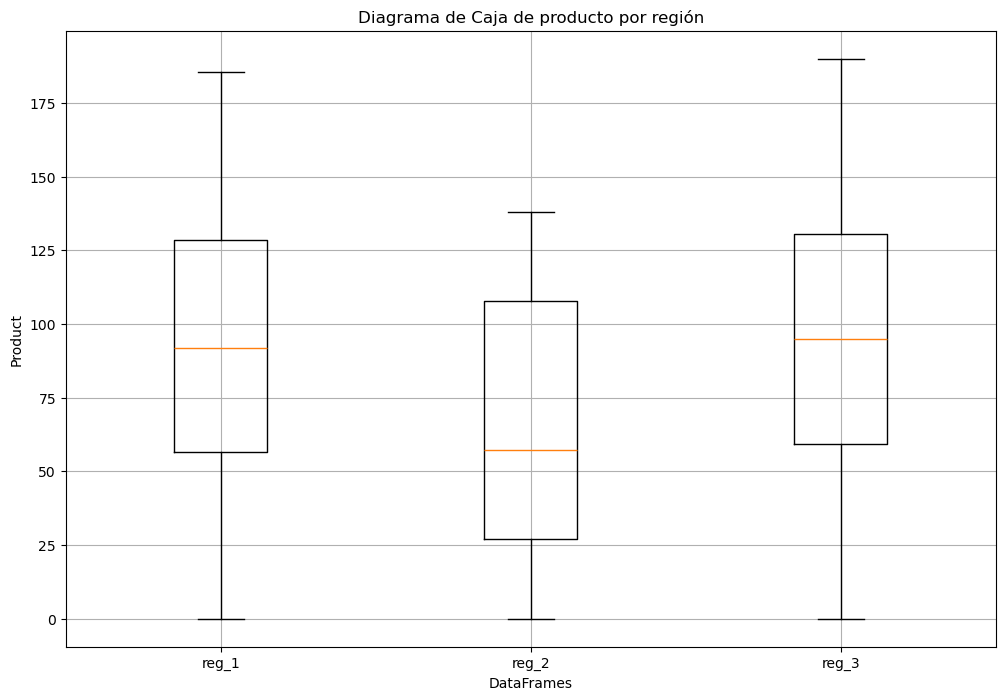

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.boxplot([df_1['product'], df_2['product'], df_3['product']], labels=['reg_1', 'reg_2', 'reg_3'])
plt.title('Diagrama de Caja de producto por región')
plt.xlabel('DataFrames')
plt.ylabel('Product')
plt.grid(True)
plt.show()


El diagrama muestra que la región 2 realmente no parece ser la mejor, con una media más baja y valores máximos más bajos también, a pesar de que el bootstrapping la muestra como la región con mayores ganancias y menor riesgo de pérdida.

## Conclusión

Los resultados del análisis con y sin bootstrapping dieron resultados muy diferentes, lo que hace que disputen como mejores regiones la 1 y la 2, pero considerando que ya se tienen los datos de todos los pozos de las regiones, considero que la elección válida sería la región 1. La técnica de bootstrapping, aunque muy educativa en este ejemplo, no creo que sea la adecuada para la selección de la región, ya que no se perforarán los pozos al azar y únicamente se perforarán los 200 que ya se sabe que son los mejores en dicha región. Si no se conocieran los datos de cada pozo, la opción indiscutible sería la sería la región 2 para minimizar riesgos.